In [1]:
from plotconfig import*
import matplotlib.pyplot as plt
import numpy as np
from qutip import*


In [2]:
def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][1]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x +1j*alpha_p),ptrace(state,1))
            cfReal[i,j] =  np.real(expect_value)
            cfImag[i,j] =  np.imag(expect_value)

    return cfReal,cfImag   
def char_func_cut(state, xvec, axis = 1):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec)))
    

    for i, alpha_x in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x*axis),state)
            cfReal[i] =  np.real(expect_value)

    return cfReal

def transmission (t):
    return np.exp(-t/t1)

def relative_to_t1(t):
    return t/t1

def calc_squeez_parameter(dB):
    return np.log(10**(dB/10))/2

# find the min value of the wigner function, assuming the blobs are align on the X axis
 
def lossy_channel(state, t_list):
    rhos_loss = mesolve(Ic,state, t_list, c_ops = a_loss).states
    return rhos_loss

def plot_wigner(
    state,
    contour=False,
    fig=None,
    ax=None,
    max_alpha=2,
    cbar=False,
    npts=51,
    vmin = -1,
    vmax = 1
):
    
    xvec = np.linspace(-max_alpha, max_alpha, npts)
    W = wigner(state ,xvec , xvec, g = 2 )
    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()
    if contour:
        levels = np.linspace(-1.1, 1.1, 102)
        im = ax.contourf(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax, levels=levels,
        )
    else:
        im = ax.pcolormesh(
            xvec, xvec, W, cmap="seismic", vmin=vmin, vmax=vmax
        )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()
    ax.set_aspect("equal")
    # ax.set_title(title)

    fig.tight_layout()


def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][0]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = expect(displace(N, alpha_x +1j*alpha_p),state)
            cfReal[j,i] =  np.real(expect_value)
            cfImag[j,i] =  np.imag(expect_value)

    return cfReal,cfImag   
 

def plot_char(
    state,
    max_alpha=3,
    npts=50,
    real = True,
    fig=None,
    ax=None,
    vmin = -1,
    vmax = 1,
    cbar = False,
    
):
    
    xvec = np.linspace(-max_alpha, max_alpha, npts)
    CF_real, CF_imag = char_func_grid(state, xvec)
    
    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()
    ax.grid()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    if real:
        im = ax.pcolormesh(xvec, xvec, (CF_real), cmap = 'bwr', vmin=vmin, vmax=vmax, shading='auto')
        ax.set_aspect('equal')
    
    else:
        
        im = ax.pcolormesh(xvec, xvec, (-CF_imag), cmap = 'bwr', vmin=vmin, vmax=vmax,shading='auto')
        ax.set_aspect('equal')
        


In [3]:
data = np.load('data/bootstrap_blob_amps.npz')
cat_blob_amps = data["cat_blob_amps"]
decay_times = data["decay_times"]
error_bars = data["error_bars"]


# System
N = 200

Iq = qeye(2)
Ic = qeye(N)
a = destroy(N)
n = a.dag()*a


### States
alpha = 1.8
cat = (coherent(N,alpha) - coherent(N,-alpha)).unit()
dBs = [0, 6]
# first cat, then squeeze
states = [squeeze(N,calc_squeez_parameter(i))for i in dBs]*cat

t1 = 261
gamma_a_loss = 1 / t1  # t1 = 100mu s
a_loss = np.sqrt(gamma_a_loss) * destroy(N)

# time evolution span
ts = decay_times/1000
rhos = []
for state in states:
    rhos.append(lossy_channel(state,ts))
    

# # extract the cuts
# xvec = np.linspace(-5,5,50)
# char_cut = []
# wigner_cut = []
# for rho in rhos:
#     char_cut.append(char_func_cut(rho[6],xvec, axis=1))
    
    

In [4]:
# # extract the cuts
xvec = np.linspace(-5,5,100)
char_cut = []
wigner_cut = []
for rho in rhos:
        char_cut.append(char_func_cut(rho[0],xvec, axis=1))

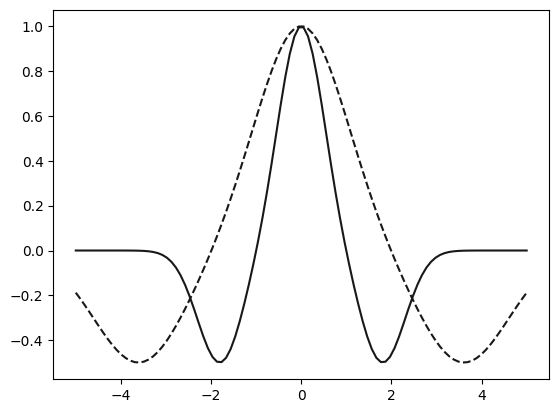

In [14]:
plt.plot(xvec, vac_array[0], label = '0dB',  linestyle = "dashed", color = [0.1, 0.09, 0.09])
plt.plot(xvec, sq6db_array[0], label = '6dB',  linestyle = "solid", color = [0.1, 0.09, 0.09])
plt.savefig("fig1_t0_nonsquare.pdf")


In [6]:
print(decay_times)
# # extract the cuts
xvec = np.linspace(-5,5,100)
char_cut_1000 = []
char_cut_10000 = []
char_cut_50000 = []
char_cut_150000 = []
for rho in rhos:
        char_cut_1000.append(char_func_cut(rho[1],xvec, axis=1))
        char_cut_10000.append(char_func_cut(rho[3],xvec, axis=1))
        char_cut_50000.append(char_func_cut(rho[5],xvec, axis=1))
        char_cut_150000.append(char_func_cut(rho[8],xvec, axis=1))

[     0   1000  10000  16000  30000  50000  70000 100000 150000 200000]


In [8]:
dark_blue = [0.12, 0.19, 0.44]
green = [0.0, 0.44, 0.21]
purple = [0.47, 0.03, 0.27]
pink = [0.89, 0.45, 0.55]
yellow = [0.98, 0.78, 0.12]
brown = [0.58, 0.3, 0.11]
turqoise = [0.47, 0.75, 0.65]

In [10]:
vac_array = [char_cut[0],char_cut_1000[0], char_cut_10000[0], char_cut_50000[0], char_cut_150000[0]]
sq6db_array = [char_cut[1],char_cut_1000[1], char_cut_10000[1], char_cut_50000[1], char_cut_150000[1]]

In [13]:
np.savez('fig1_1dcuts', vac = vac_array, sq = sq6db_array, xvec = xvec, times = [0, 1, 10, 50, 150] )

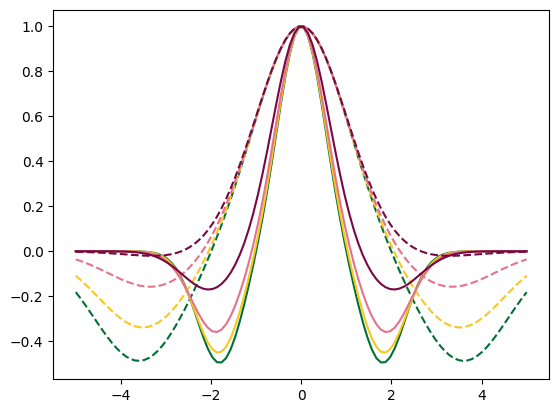

In [9]:
plt.plot(xvec, char_cut_1000[0], label = '0dB',  linestyle = "dashed",color = green)
plt.plot(xvec, char_cut_1000[1], label = '0dB',   linestyle = "solid",color = green)

plt.plot(xvec, char_cut_10000[0], label = '0dB',  linestyle = "dashed",color = yellow)
plt.plot(xvec, char_cut_10000[1], label = '0dB',   linestyle =  "solid",color = yellow)

plt.plot(xvec, char_cut_50000[0], label = '0dB',  linestyle = "dashed",color = pink)
plt.plot(xvec, char_cut_50000[1], label = '0dB',   linestyle =  "solid",color = pink)

plt.plot(xvec, char_cut_150000[0], label = '0dB',  linestyle = "dashed",color = purple)
plt.plot(xvec, char_cut_150000[1], label = '0dB',   linestyle =  "solid",color = purple)

In [86]:
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['figure.figsize'] = [2*cm, 3*cm]
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.size'] = 1.5
mpl.rcParams['ytick.major.size'] = 1.5
mpl.rcParams['xtick.minor.size'] = 1.5
mpl.rcParams['ytick.minor.size'] = 1.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['xtick.major.top'] = False
mpl.rcParams['xtick.major.bottom'] = True
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['xtick.labelbottom'] = False
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.labelleft'] = False
mpl.rcParams['ytick.direction'] = 'in'

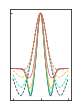

In [87]:
plt.plot(xvec, char_cut_1000[0], label = '0dB',  linestyle = "dashed",color = '#073b4c')
plt.plot(xvec, char_cut_1000[1], label = '0dB',   linestyle = "solid",color = '#073b4c')

plt.plot(xvec, char_cut_10000[0], label = '0dB',  linestyle = "dashed",color = '#06d6a0')
plt.plot(xvec, char_cut_10000[1], label = '0dB',   linestyle =  "solid",color = '#06d6a0')

plt.plot(xvec, char_cut_50000[0], label = '0dB',  linestyle = "dashed",color = '#ecaf20')
plt.plot(xvec, char_cut_50000[1], label = '0dB',   linestyle =  "solid",color = '#ecaf20')

plt.plot(xvec, char_cut_150000[0], label = '0dB',  linestyle = "dashed",color = '#ef476f')
plt.plot(xvec, char_cut_150000[1], label = '0dB',   linestyle =  "solid",color = '#ef476f')
plt.savefig("fig1_decay_nonsquare.pdf")

In [73]:
plt.savefig("fig1_decay")

<Figure size 118.11x118.11 with 0 Axes>